<a href="https://colab.research.google.com/github/PS-The-SocioPath/Sentiment-Analysis-using-Machine-Learning/blob/main/Copy_of_Week_2_Assignment_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Pratham Bhavik Shah

## Roll Number: 200110102

## Instructions

* Please don't try to fill/write the code in this file.
* Firstly, make a copy of this file to your drive.
* Then fill the code block wherever it is required.
* There will be submission link below. The same link will be provided in nition page too.
* Please try to code to the point. Don't make the code to revolve arounf something that is really unnecessary.
* You can take the help from LLM's and get the overview of the problem on how to approach, understand any errors to resolve them.
* Please try to code yourself. As it is the first assignment, we are making it easy. `Don't Copy / Paste` the code directly from `ChatGPT / Gemini` or any other LLM's as it gives nothing to learn apart from the code.
* If you are really not able to code it, I suggest you to please revisit the resources provided.
* Still if you face any issue, post the issue along with screenshot in the group.

### Submission link: https://forms.gle/t4RGynRgnoTy56Wz8


### Part 1: Heart Disease Prediction Using Logistic Regression

* The dataset: [health dataset](https://drive.google.com/file/d/1HBCiFFS6xx2UT4o-bqRfKahfIGLvmsVz/view?usp=sharing)

* Perform the appropriate data analysis (Expected atleast a bit), data preprocessing and then build the model. Evalute over the validation data using the metrics Accuracy, Precision, Recall, F1 score.

In [ ]:
### Importing the libraries as the need arises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

### Section 1 - Data Analysis

# Importing the data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4pHPd3J1tIsppeee02gWE-7dGGweumBn-GXSeq-0TDyXq0KqWKlO2gk5WoAgFiB8Y1prHFJH43zYQ/pub?gid=530138367&single=true&output=csv')
print(df.head())

# Inspecting the Data
print(df.describe())
print(df.info())
df.head(10)

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4230     0   56        1.0              1         3.0     0.0   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4230                0             1         0    268.0  170.0  102.0  22.89   
4231                0             1         0    187.0  141.0   81.0  24.96   
4232                0             1         0  

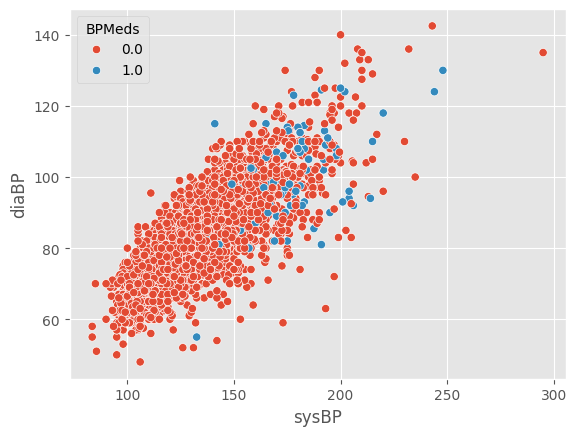

<ipython-input-19-75f40ec09018>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal = df[df.totChol < 200].count()[0]
<ipython-input-19-75f40ec09018>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  borderline_high = df[(df.totChol >= 200) & (df.totChol < 240)].count()[0]
<ipython-input-19-75f40ec09018>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  high = df[df.totChol >= 240].count()[0]


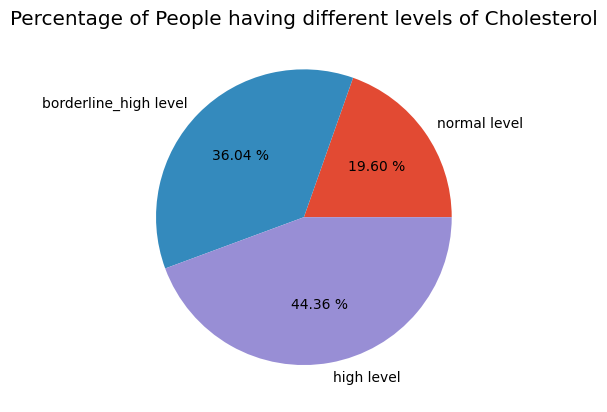

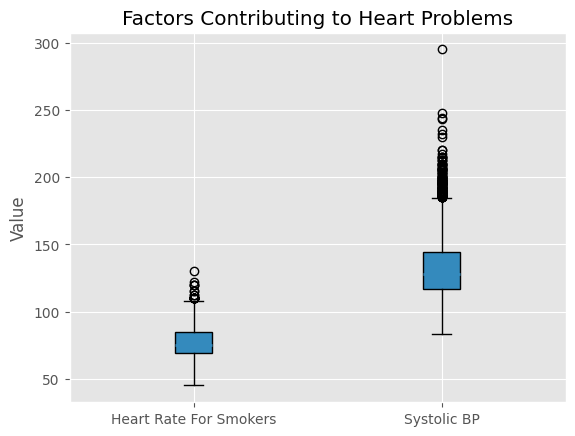

In [ ]:
### Section 2: Data PreProcessing
### Now we need to perform DATA CLEANING for outliers and missing values

## Filling columns having entries as NA with average values of the column.
## On seeing the describe output, we get the columns having NA values.
## If columns with binary entries have NA, we then fill them with mode.
## We will also round the values upto 2 decimal places

df['education'] = df['education'].fillna(df['education'].mean()).apply(lambda x: round(x, 2))
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean()).apply(lambda x: round(x, 2))
df['totChol'] = df['totChol'].fillna(df['totChol'].mean()).apply(lambda x: round(x, 2))
df['BMI'] = df['BMI'].fillna(df['BMI'].mean()).apply(lambda x: round(x, 2))
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean()).apply(lambda x: round(x, 2))
df['glucose'] = df['glucose'].fillna(df['glucose'].mean()).apply(lambda x: round(x, 2))

df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

print(df.tail(10))

print(df.head(20))

## In entry number 14 of glucose, we can check the above replacement

### Commented unrequired code
# bp_type = ['systolic', 'diastolic']

# plt.scatter(df['sysBP'], df['diaBP'], label = bp_type, hue)

# plt.ylabel('Diastolic Blood Pressure')
# plt.xlabel('Systolic Blood Pressure')

# plt.title('Blood Pressure Scatter Data')

# plt.legend()
# plt.show()

#### DATA VISUALIZATION using Matplotlib and Seaborn

print('\n')

### Seaborn Scatter Plot
sns.scatterplot(x = df['sysBP'], y = df['diaBP'], hue = df['BPMeds'])

plt.show()

# plt.style.use('ggplot')

normal = df[df.totChol < 200].count()[0]
borderline_high = df[(df.totChol >= 200) & (df.totChol < 240)].count()[0]
high = df[df.totChol >= 240].count()[0]

levels = [normal, borderline_high, high]
label_2 = ['normal level', 'borderline_high level', 'high level']

plt.title('Percentage of People having different levels of Cholesterol')

plt.pie(levels, labels=label_2, autopct='%.2f %%')
print("\n")
plt.show()

### Outlier Handling using boxplots
## Systolic is more important for heart problems as per Google

cigs = df.loc[df.cigsPerDay != 0]['heartRate']
bp_problem = df.loc[df.sysBP != 0]['sysBP']

bp = plt.boxplot([cigs,bp_problem], labels = ['Heart Rate For Smokers', 'Systolic BP'], patch_artist=True, medianprops={'linewidth': 2})

plt.ylabel('Value')
plt.title('Factors Contributing to Heart Problems')
print("\n")
plt.show()

for box in bp['boxes']:
    ### Setting edge color of the outline
    box.set(color='yellow',linewidth =2)

    ### Setting the fill color of the box
    box.set(facecolor = '#e0e0e0')

### The above data viz & EDA is limited as it hasn't been asked to be done explicitly,
### now I move to the next section that involves further Data processing while building the models
### where finally I will conclude with Evaluation of the model

In [ ]:
### Section 3. Model Building and Evaluation for prediction

# First we split the dataset to provide data for training and testing
# Splitting is done into independent and dependent feature classes

x = df.iloc[:,:-1]                             ## This will include all columns except last as ten year congenital heart disease is dependent and the rest are independent
y = df.iloc[:,-1]                              ## Last column only


## Making the model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.20, random_state = 45
)

cl = LogisticRegression()

my_parameter = {'penalty': ['l1','l2','elasticnet'], 'C': [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5], 'max_iter': [100, 200, 300]}

cl_reg = GridSearchCV(cl, param_grid = my_parameter, scoring = 'accuracy', cv = 20)              ### For a classification problem scoring is always set to 'accuracy'

cl_reg.fit(x_train, y_train)

### If we click on the icons of gridsearchcv and other things in the output of last line in above code, we get to see required outputs for best parameter/estimator etc.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
### Evaluation

print("Best Parameter:", cl_reg.best_params_)
print("Best Estimator:", cl_reg.best_estimator_)
print("Best Index:", cl_reg.best_index_)
print("Best Score:", cl_reg.best_score_)

### 85% best score is obtained in this first output which can be modified by modifying certain parameters

my_pred = cl_reg.predict(x_test)

acc_score = accuracy_score(my_pred, y_test)
print("Accuracy:", acc_score)

my_f1_score = f1_score(my_pred, y_test)
print("f1 score:", my_f1_score)

prec_score = precision_score(my_pred, y_test)
print("Precision Score:", prec_score)

rec_score = recall_score(my_pred, y_test)
print("Recall Score:", rec_score)

cl_report = classification_report(my_pred, y_test)
print("Complete Classification Report:", cl_report, sep='\n')

### In my first outputs, we have a high precision (99%) but medium accuracy with which we predict CHD using the other variables/features
### So we can modify our parameters, till we get a good accuracy score

### This will show us with what accuracy can we predict people having congenital heart disease from the given dataset.

### Source for learning this: Krish Naik DS Channel @ Youtube, have understood it and then performed the above analysis

## Even after modifying the parameters max_iter and C, the accuracy remains more or less in range of 85-86%, whereas the weighted average is in range of 97-98%,
## & precision of 99% almost always for 1st iteration (0)

Best Parameter: {'C': 0.35, 'max_iter': 200, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.35, max_iter=200)
Best Index: 58
Best Score: 0.8520048729550991
Accuracy: 0.8561320754716981
f1 score: 0.07575757575757576
Precision Score: 0.041666666666666664
Recall Score: 0.4166666666666667
Complete Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       836
           1       0.04      0.42      0.08        12

    accuracy                           0.86       848
   macro avg       0.52      0.64      0.50       848
weighted avg       0.98      0.86      0.91       848



### Part 2: Customer Segmentation using Unsupervised Machine Learning

* The dataset: [customer dataset](https://drive.google.com/file/d/1uiucKVp5l9X1aIDhq_JlQAHsl3FA0f1B/view?usp=sharing)

* Perform the appropriate data analysis, data preprocessing and then build the model. Select the approappropriate number of clusters with the proper explanation (If you don't know how to select do search about it, you will find easily over the internet)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

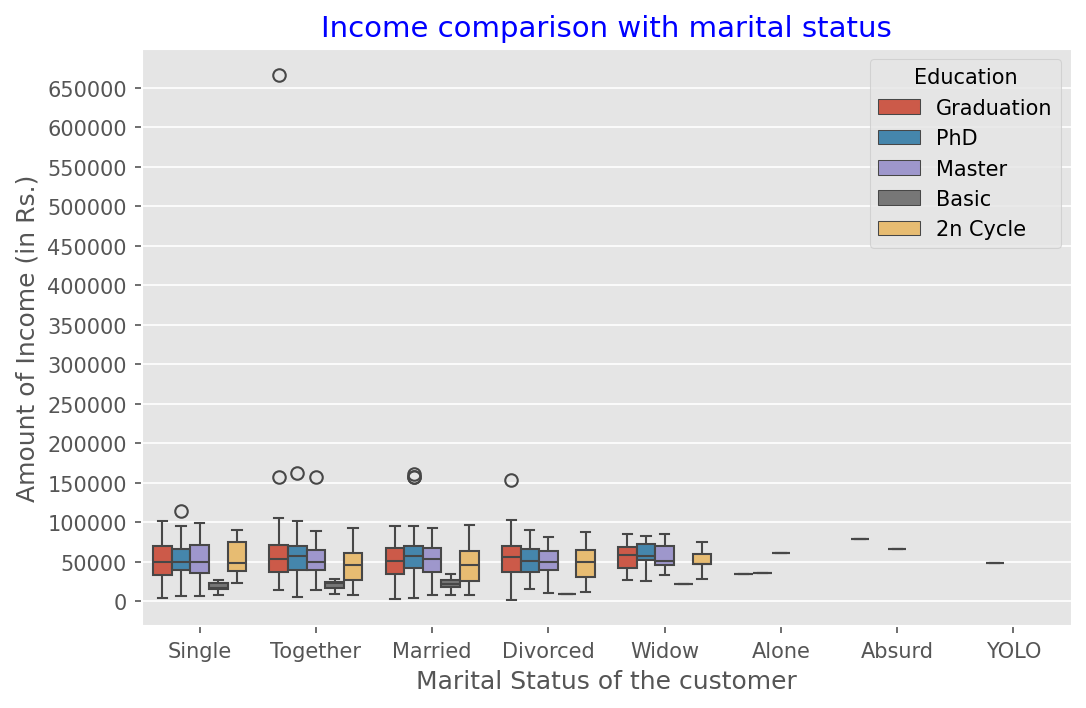

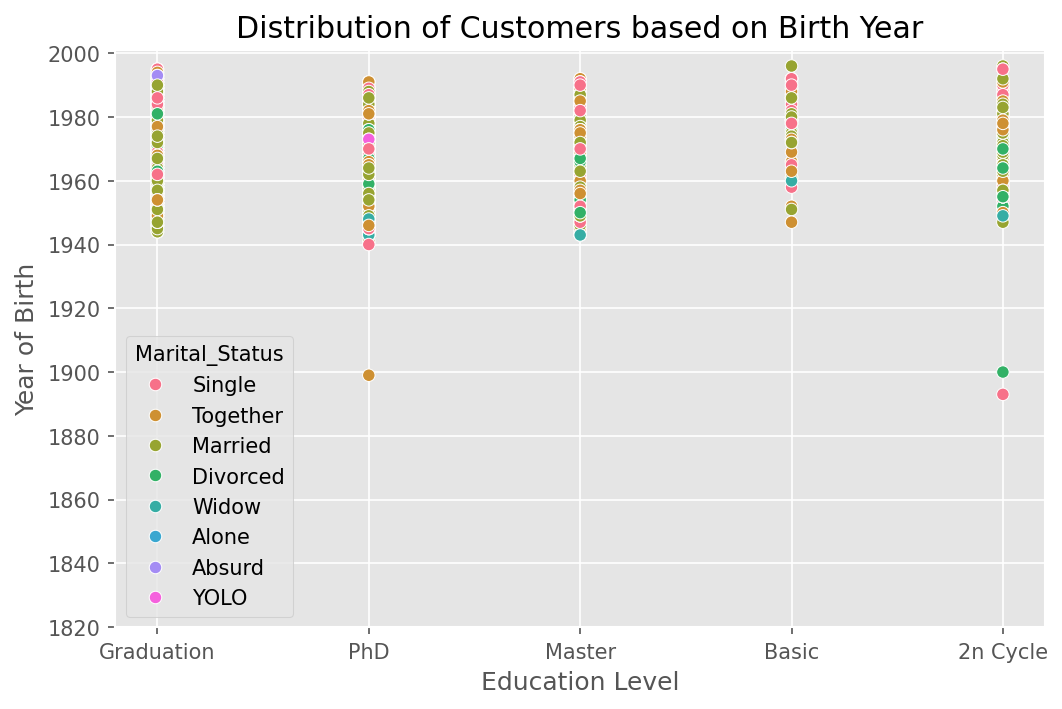



['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 



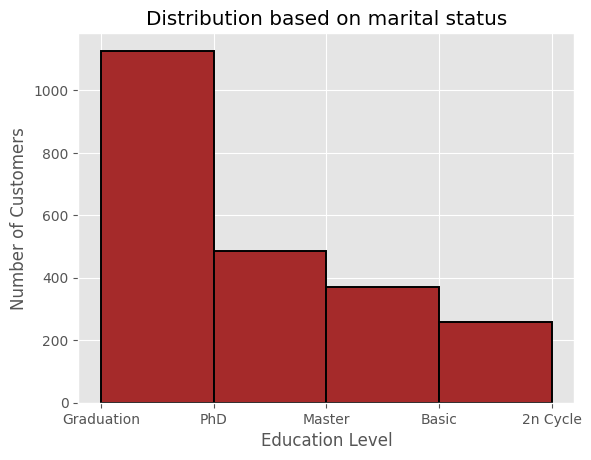

In [ ]:
### Importing the required libraries/modules/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

df_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSfdMu8wG8tipURW-y3bdqoegETCagFG1y9RMSMHkUSGjlVFooWydkKe_rWSvKNuJg9sPu4RMRCHscF/pub?gid=96719218&single=true&output=csv')

print(df_1.head())

#### Section 1. Data Analysis & Visualization

### Data Inspection
print(df_1.describe())
print(df_1.info())

## There are no null values in this dataset as per the info and describe outputs as well as after finding in the csv

df_1['ID'].duplicated()

## And also no duplicate IDs, to be removed or replaced

### Exploratory Data Analysis (EDA)

### Outlier Handling using Boxplots (seaborn this time)

plt.figure(figsize=(8,5), dpi = 150)

plt.style.use('ggplot')

sns.boxplot(df_1, y = df_1['Income'], x = df_1['Marital_Status'], hue = df_1['Education'])

plt.ylabel('Amount of Income (in Rs.)')
plt.xlabel('Marital Status of the customer')

plt.yticks(np.arange(0, 700000, step = 50000))

plt.title("Income comparison with marital status", fontdict={"fontname": "Sans", "color": "blue", "weight": "normal", "size": 14})

plt.show()

### Creating an sns scatterplot

print('\n')

plt.figure(figsize=(8,5), dpi = 150)

sns.scatterplot(y = df_1['Year_Birth'], x = df_1['Education'], hue = df_1['Marital_Status'])

plt.title("Distribution of Customers based on Birth Year")
plt.ylabel('Year of Birth')
plt.xlabel('Education Level')

plt.yticks(np.arange(1820, 2020, step=20))
plt.show()

### Creating a Histogram
print("\n")

print(df_1['Education'].unique(),"\n")

bins_1 = df_1['Education'].unique()

plt.hist(df_1.Education, bins = bins_1, color='brown', edgecolor = 'black', linewidth = 1.4)

plt.title('Distribution based on marital status', loc = 'center')
plt.ylabel('Number of Customers')
plt.xlabel('Education Level')

plt.show()

###

In [ ]:
### Section 2. Building the clustering model & the associated customer segmentation

